In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "crime_data_cleaned.csv"   # adjust path if needed
crime_df = pd.read_csv(file_path)

# Preview
crime_df.head()


,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes


In [32]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [33]:
# Convert date columns
crime_df['Date Reported'] = pd.to_datetime(crime_df['Date Reported'], errors='coerce')
crime_df['Date of Occurrence'] = pd.to_datetime(crime_df['Date of Occurrence'], errors='coerce')
crime_df['Time of Occurrence'] = pd.to_datetime(crime_df['Time of Occurrence'], errors='coerce')

# Extract features
crime_df['Year'] = crime_df['Date of Occurrence'].dt.year
crime_df['Month'] = crime_df['Date of Occurrence'].dt.month
crime_df['Day'] = crime_df['Date of Occurrence'].dt.day
crime_df['Weekday'] = crime_df['Date of Occurrence'].dt.day_name()
crime_df['Hour'] = crime_df['Time of Occurrence'].dt.hour

crime_df[['Date of Occurrence','Year','Month','Weekday','Hour']].head()


,Date of Occurrence,Year,Month,Weekday,Hour
0,2020-01-01 00:00:00,2020,1,Wednesday,1.0
1,2020-01-01 01:00:00,2020,1,Wednesday,6.0
2,2020-01-01 02:00:00,2020,1,Wednesday,14.0
3,2020-01-01 03:00:00,2020,1,Wednesday,14.0
4,2020-01-01 04:00:00,2020,1,Wednesday,16.0


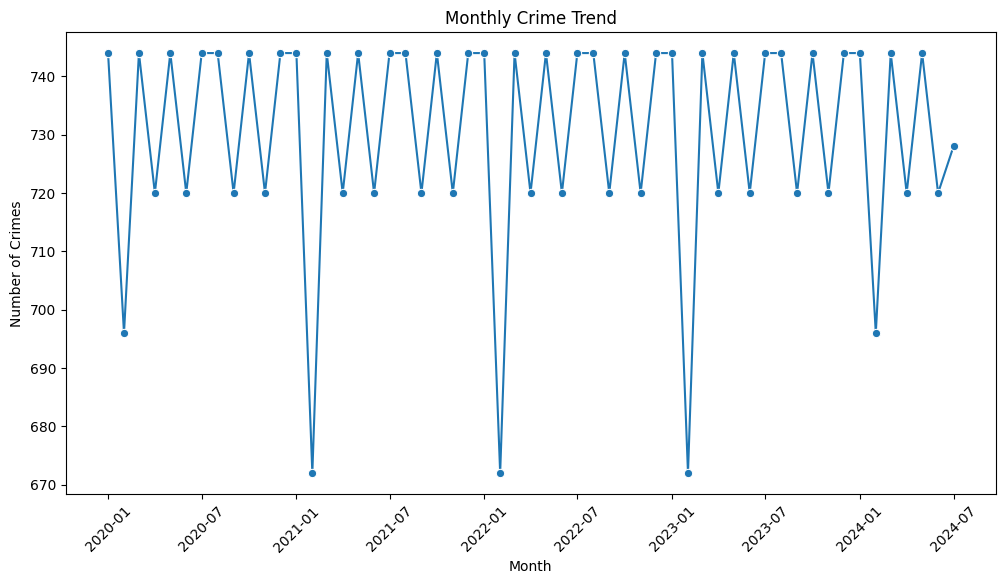

C:\Users\TUSHAR BAG\AppData\Local\Temp\ipykernel_13496\632622407.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_trend, x="Year", y="Count", palette="viridis")


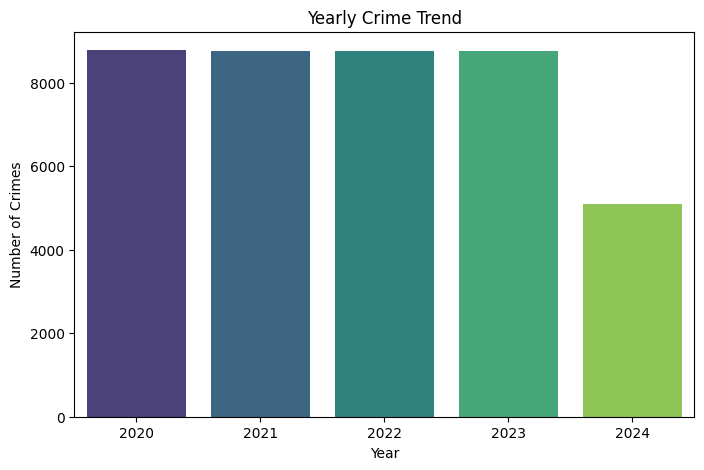

In [34]:
# Monthly trend
monthly_trend = crime_df.groupby(crime_df['Date of Occurrence'].dt.to_period('M')).size().reset_index(name="Count")
monthly_trend['Date'] = monthly_trend['Date of Occurrence'].dt.to_timestamp()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_trend, x="Date", y="Count", marker="o")
plt.title("Monthly Crime Trend")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.show()

# Yearly trend
yearly_trend = crime_df.groupby('Year').size().reset_index(name="Count")

plt.figure(figsize=(8,5))
sns.barplot(data=yearly_trend, x="Year", y="Count", palette="viridis")
plt.title("Yearly Crime Trend")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.show()


C:\Users\TUSHAR BAG\AppData\Local\Temp\ipykernel_13496\3432527724.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=crime_df, x="Weekday", order=weekday_order, palette="Set2")


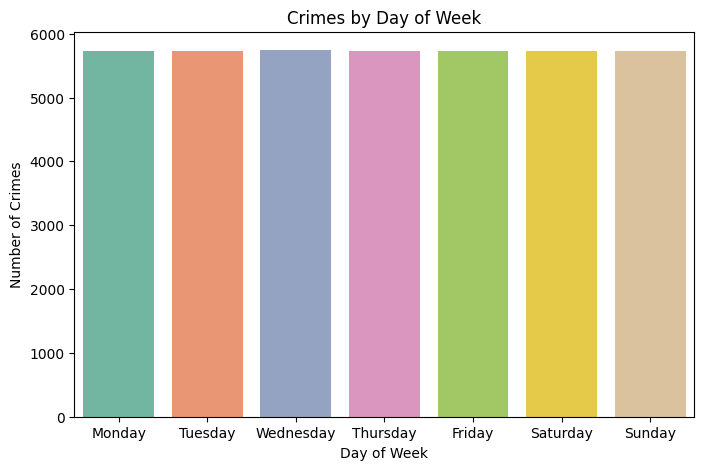

C:\Users\TUSHAR BAG\AppData\Local\Temp\ipykernel_13496\3432527724.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=crime_df, x="Month", palette="Set1")


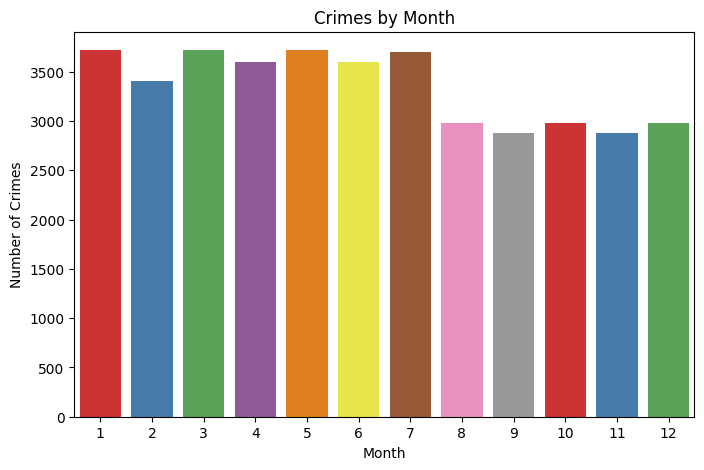

In [35]:
# Crimes by weekday
weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

plt.figure(figsize=(8,5))
sns.countplot(data=crime_df, x="Weekday", order=weekday_order, palette="Set2")
plt.title("Crimes by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Crimes")
plt.show()

# Crimes by month
plt.figure(figsize=(8,5))
sns.countplot(data=crime_df, x="Month", palette="Set1")
plt.title("Crimes by Month")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.show()


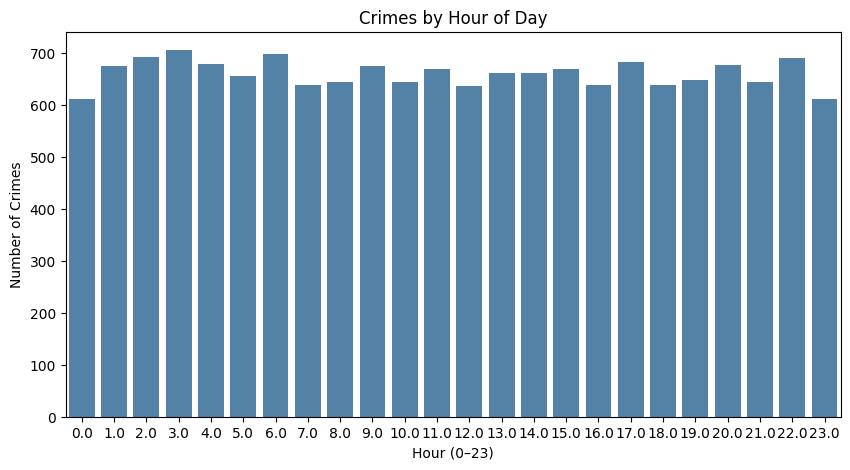

In [36]:
# Crimes by hour
plt.figure(figsize=(10,5))
sns.countplot(data=crime_df, x="Hour", color="steelblue")
plt.title("Crimes by Hour of Day")
plt.xlabel("Hour (0–23)")
plt.ylabel("Number of Crimes")
plt.show()


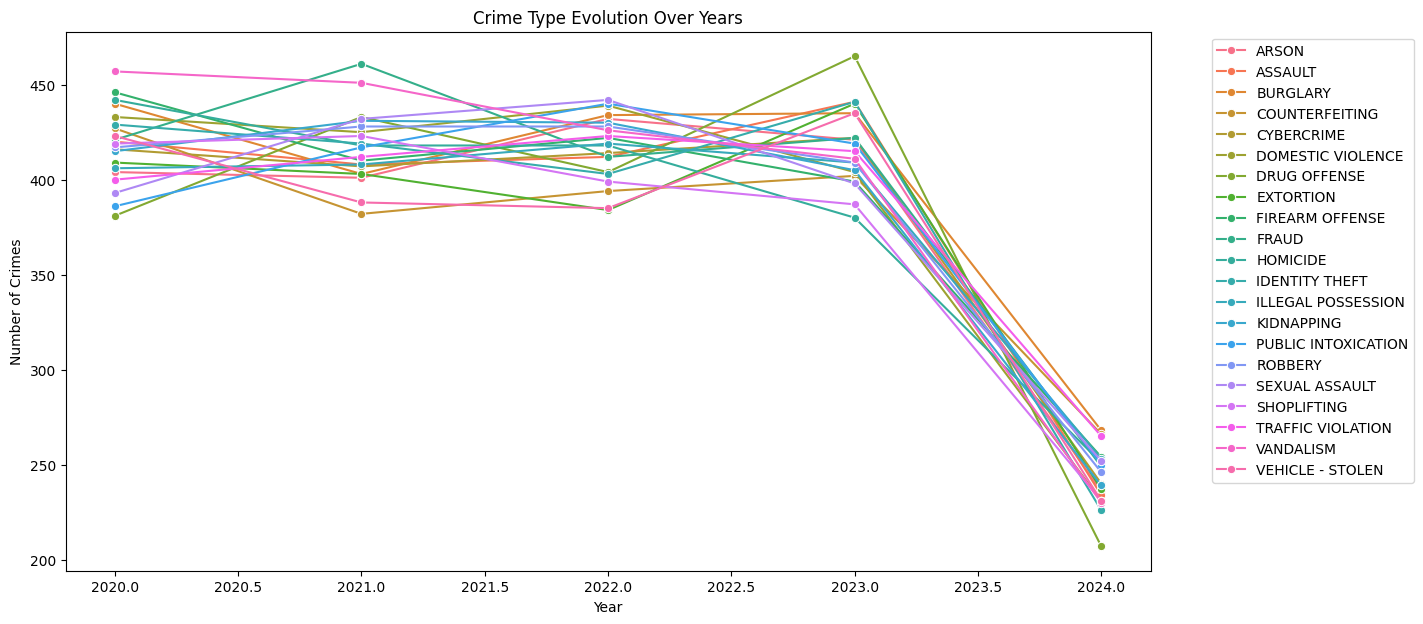

In [37]:
# Crimes by type over years
crime_type_trend = crime_df.groupby(['Year','Crime Description']).size().reset_index(name="Count")

plt.figure(figsize=(14,7))
sns.lineplot(data=crime_type_trend, x="Year", y="Count", hue="Crime Description", marker="o")
plt.title("Crime Type Evolution Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



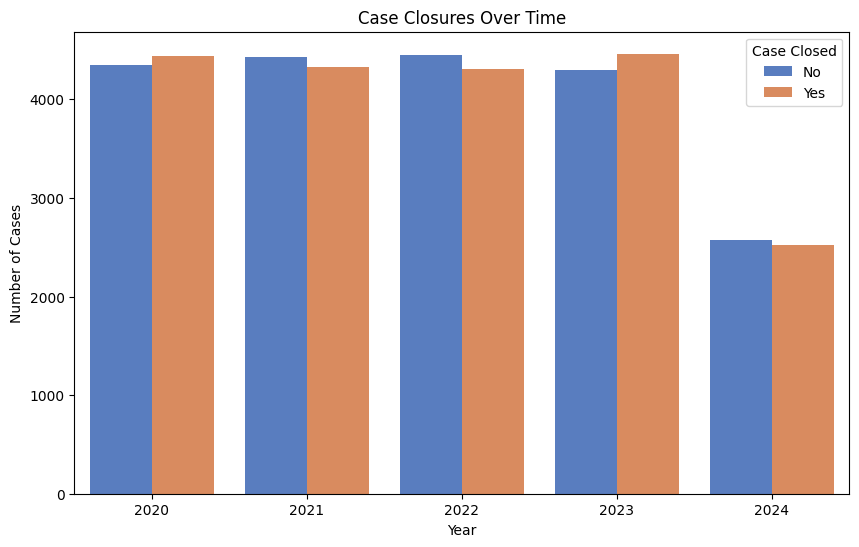

In [38]:
# Case closures by year
closure_trend = crime_df.groupby(['Year','Case Closed']).size().reset_index(name="Count")

plt.figure(figsize=(10,6))
sns.barplot(data=closure_trend, x="Year", y="Count", hue="Case Closed", palette="muted")
plt.title("Case Closures Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.show()


In [39]:
crime_daily = crime_df.groupby('Date of Occurrence').size().reset_index(name='Crime Count')

crime_daily = crime_daily.rename(columns={'Date of Occurrence':'ds','Crime Count':'y'})

crime_daily.head()


,ds,y
0,2020-01-01 00:00:00,1
1,2020-01-01 01:00:00,1
2,2020-01-01 02:00:00,1
3,2020-01-01 03:00:00,1
4,2020-01-01 04:00:00,1
